In [5]:
import sympy
from sympy import diff, symbols
x, y, z = symbols("x y z")
expr = x-x*y+z**2
print(expr.diff(x))
print(expr.diff(y))
print(expr.diff(z))

1 - y
-x
2*z


In [15]:
import sympy
import numpy as np
from sympy import diff, symbols
a, b = symbols("a b")
f = (5-a-2*b)**2
print(f.diff(a))
print(f.diff(b))

2*a + 4*b - 10
4*a + 8*b - 20


In [17]:
from sympy import solveset, Eq
y = f.diff(b)
solveset(Eq(y, 0), x)

EmptySet

In [6]:
# Итак, перейдём к примеру вычислений. Для работы с градиентом импортируем хорошо известную нам библиотеку NumPy:
import numpy as np

In [7]:
# Зададим массив, для которого хотим найти градиент, и вычислим его:

f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [8]:
# Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем 
# обычную разность для соседних элементов массива:

print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [9]:
# А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2:

(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

In [10]:
# Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину 
# обычного шага у края и удвоенную величину шага для элементов внутри вектора:

np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


In [20]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=float)
 
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

Мы разобрались с тем, как работает градиентный спуск в теории. Теперь давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

In [26]:
# Определим функцию, которая вычислит градиент:
import numpy as np
import matplotlib.pyplot as plt

def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

# Также запрограммируем простейший вариант для градиентного спуска:

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

#Напишем функцию, которая будет строить график:

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

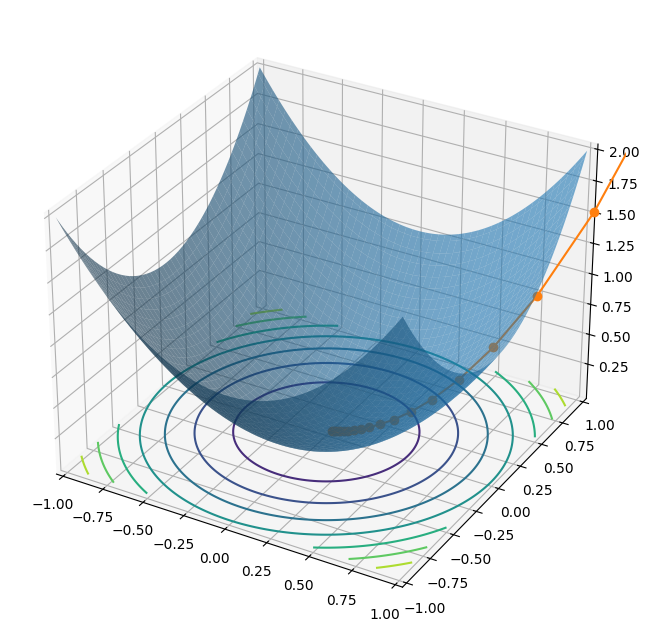

In [27]:
# Визуализируем и получим следующее движение градиентного спуска к минимуму:

trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)